In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

import spacy 
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud
from collections import Counter
from nltk import word_tokenize, FreqDist
import re
import string

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import GRU, Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from time import time

import glob

from sklearn.svm import SVC


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
import seaborn as sns

import warnings

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split 

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Helper Functions

# <font color='red'> ADD DOCSTRINGS FOR THESE below. PUT into PY file. Put an appendix so people know what functions are being used in what notebooks and what they are. Function name, docstring in appendix.
   
    
    Description: What it does
    Inputs: what the inputs are
    Output: What the outputs are
    
    All on separate lines
    
    Use triple quotes
    
    Check sklearn and pandas for good examples
    

# ADD "in this notebook" for this section

In [5]:
#Function to put the training and testing accuracy of each model in a list of models
def model_results_dataframe(model_list, model_names, features_train, target_train, features_test, target_test):
    #Place to start 
    result_list = []
    
    for i, model in enumerate(model_list):
        #Fit the model to the data and make predictions
        model.fit(features_train, target_train)
        training_preds = model.predict(features_train)
        testing_preds = model.predict(features_test)
        
        #Accuracy scores for each model
        train_accuracy = accuracy_score(target_train, training_preds)
        test_accuracy = accuracy_score(target_test, testing_preds)
        
        #Put them in results
        result_list.append([model_names[i],train_accuracy, test_accuracy])
    
    column_names = ['Model Name', 'Training Accuracy', 'Testing Accuracy']
    results_df = pd.DataFrame(result_list, columns=column_names)
    results_df = results_df.sort_values(by=['Testing Accuracy'], ascending=False)
    return results_df

In [6]:
#Plots a confusion matrix of a given model

def plot_confusion_matrix(y_test, model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia, origin='lower')
    classNames = ['Non-Hit','Hit']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [278]:
# Shows confusion matrix and classification report for a model after it has been fitted
# Shows confusion matrix and classification report for a model after it has been fitted
def results_summary_binary(mymodel, model_name, X_test, y_test):
    model_preds = mymodel.predict(X_test)
    model_measures = mymodel.evaluate(X_test, y_test)
    
    accuracy = round(model_measures[1],4)
    loss = round(model_measures[0],4)
    
    class_report = classification_report(y_test, model_preds.argmax(axis=1), target_names=['Non-Hit', 'Hit'])
    
    statement = str("MODEL {} \nAccuracy Score: {} \nLoss: {}".format(model_name, accuracy, loss))
    plot_confusion_matrix_binary(y_test, model_preds, normalize=False)
    plot_confusion_matrix_binary(y_test, model_preds, normalize=True)
    
    print(str(statement + "\n\n" + "CLASSIFICATION REPORT \n" + class_report))

In [277]:
#Plots a confusion matrix of a given model

def plot_confusion_matrix_binary(y_test, model_test, normalize=False):
    cm = confusion_matrix(y_test, model_test.argmax(axis=1))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(4)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.figure(figsize=(6,6))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia, origin='lower')
    classNames = ['Non-Hit','Hit']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [8]:
# Shows roc_curve for a model after it has been fitted.
def roc_curves(unfitted_model, X_train, y_train, X_test, y_test):
    unfitted_model.fit(X_train, y_train)
    model_preds = unfitted_model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(model_preds,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [149]:
#Visualizes feature importance on a horizontal bar chart for a given model
def feature_importance_visualization(model, X_train, y_train, mytitle):
    model.fit(X_train, y_train)
    
    feature_importances = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
    feature_importances = feature_importances[:10]
    feature_importances = feature_importances.sort_values(ascending=True)

    plt.figure(figsize=(6,6))

    feature_importances.plot.barh(width=0.5)

    plt.title(mytitle)
    plt.show()

In [240]:
# Helper functions 
# Setting up a function to help visualize performance of deep learning models.

def deep_learning_visuals(model_history):

    #Store the fitted model history into a dictionary
    hist_dict = model_history.history
    
    # Putting the training and testing loss into the dictionary
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']

    # Putting the training and testing accuracies into the dictionary
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc'] 
    
    # Getting a range of epochs to use as the x-axis (essentially models over time)
    epochs = range(1, len(loss_values) + 1)
    #Create the figure
    fig, ax = plt.subplots(1, 2, figsize=[20,8])
    
    # Formatting plot for losses
    ax[0].plot(epochs, loss_values, 'red', label='Training Loss')
    ax[0].plot(epochs, val_loss_values, 'green', label='Validation Loss')
    ax[0].set_title('Training vs. Validation LOSS', fontsize=25)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('Loss', fontsize=16)
    ax[0].legend()
    
    # Formatting plot for accuracies
    ax[1].plot(epochs, acc_values, 'red', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_values, 'green', label='Validation Accuracy')
    ax[1].set_title('Training vs. Validation ACCURACY', fontsize=25)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('Accuracy', fontsize=16)
    
    plt.legend()
    plt.show()

In [150]:
# Importing that dataframe that I cleaned in the Video Game EDA notebook
preprocessed_data = pd.read_csv('Preprocessed_data.csv')

In [151]:
preprocessed_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Hit_or_not,BINARY_Hits
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Hit,1.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Hit,1.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Hit,1.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Hit,1.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Hit,1.0


In [152]:
preprocessed_data.isnull().sum().sort_values(ascending=False)

User_Count         10221
User_Score         10192
Critic_Count        9701
Critic_Score        9520
Rating              7121
Developer           6541
BINARY_Hits            0
NA_Sales               0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
Other_Sales            0
EU_Sales               0
JP_Sales               0
Hit_or_not             0
Global_Sales           0
Name                   0
dtype: int64

There are several issues with this dataframe that need to be resolved before I can begin modeling. 
- Far too many null values in the following categories
    - Critic Score
    - User Score
    - Rating
    - Developer
- Sales columns are still included
    - This is a problem because our classifer target (hit or not) was feature engineered using global sales. 

In [153]:
columns_to_keep = ['Platform', 'Genre', 'Publisher', 'Rating', 'Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'BINARY_Hits']

For the inital model since there was so many critic scores and ratings missing, I decided to drop the data that had null values for these fields. As such, the final preprocessed data for modeling will contain the following features...
- Platform
- Genre
- Publisher
- Rating
- Year of Release
- Critic Score
- Hit or not (target)

In [154]:
model_data = preprocessed_data[columns_to_keep]

In [155]:
model_data.isnull().sum().sort_values(ascending=False)

User_Count         10221
User_Score         10192
Critic_Count        9701
Critic_Score        9520
Rating              7121
BINARY_Hits            0
Year_of_Release        0
Publisher              0
Genre                  0
Platform               0
dtype: int64

In [156]:
model_data.head()

,Platform,Genre,Publisher,Rating,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits
0,Wii,Sports,Nintendo,E,2006.0,76.0,51.0,8.0,322.0,1.0
1,NES,Platform,Nintendo,NaN,1985.0,NaN,NaN,NaN,NaN,1.0
2,Wii,Racing,Nintendo,E,2008.0,82.0,73.0,8.3,709.0,1.0
3,Wii,Sports,Nintendo,E,2009.0,80.0,73.0,8.0,192.0,1.0
4,GB,Role-Playing,Nintendo,NaN,1996.0,NaN,NaN,NaN,NaN,1.0


In [157]:
model_data.dropna(subset=['Critic_Score', 'Rating', 'Critic_Score', 'User_Score', 'User_Count'], inplace=True)

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [158]:
model_data.isnull().sum().sort_values(ascending=False)

BINARY_Hits        0
User_Count         0
User_Score         0
Critic_Count       0
Critic_Score       0
Year_of_Release    0
Rating             0
Publisher          0
Genre              0
Platform           0
dtype: int64

In [159]:
len(model_data)

6825

# Preprocessing and Reducing Dimensionality

<font color='red'> Add a little bit of verbage here to explain how dimensionality was reduced.

In [160]:
model_data['Rating'].value_counts()

T       2378
E       2081
M       1433
E10+     930
K-A        1
AO         1
RP         1
Name: Rating, dtype: int64

In [161]:
# Need to make ratings consistent
# Dropping the K-A, RP, and AO
model_data.drop(model_data.loc[model_data['Rating'] == 'RP'].index, inplace=True)
model_data.drop(model_data.loc[model_data['Rating'] == 'K-A'].index, inplace=True)
model_data.drop(model_data.loc[model_data['Rating'] == 'AO'].index, inplace=True)

C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [162]:
# Replacing E10 with E10+ for consistency
model_data.loc[model_data['Rating'] == 'E10', "Rating"] = "E10+"

C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [163]:
model_data.loc[model_data['Rating'] == 'RP'].index

Int64Index([], dtype='int64')

In [164]:
model_data['Rating'].value_counts()

T       2378
E       2081
M       1433
E10+     930
Name: Rating, dtype: int64

In [165]:
# Dropping Genres that are very limited to reduce dimensionality.
model_data['Genre'].value_counts()

Action          1631
Sports           942
Shooter          864
Role-Playing     712
Racing           579
Platform         403
Misc             383
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [166]:
# Dropping genres that have very few games
genres_to_drop = ['Action-Adventure', 'Music', 'Sandbox', 'MMO', 'Board Game']
for drop_genre in genres_to_drop:
    to_drop_data = model_data.loc[model_data['Genre'] == drop_genre]
    model_data.drop(to_drop_data.index, inplace=True)

C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [167]:
model_data['Publisher'].nunique()

262

While I want to include publisher in the model, I'm worried the number of publishers will lead to overfitting when I pull dummies for all of these. A potential option to reduce dimensionality would be to only include the top 40 or so publishers and then classify everyone else as "other publisher". First I will attempt a model though

In [168]:
model_data['Publisher'].value_counts()

Electronic Arts                           941
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      272
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                138
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

In [169]:
publisher_count_df = model_data.groupby('Publisher', axis=0).count().reset_index()[['Publisher', 'Year_of_Release']]

In [170]:
# Currently there are 321 publishers, far too many to make a good model probably
len(publisher_count_df)

262

In [171]:
# Counting how many publishers had less than or equal to 5 releases
len(publisher_count_df.loc[publisher_count_df['Year_of_Release'] <=5]['Publisher'])

183

In [172]:
# Compiling a list of all publishers with less than 5
publishers_to_eliminate = list(publisher_count_df.loc[publisher_count_df['Year_of_Release'] <=5]['Publisher'])

In [173]:
for publisher in publishers_to_eliminate:
    model_data.loc[model_data['Publisher'] == publisher, 'Publisher'] = 'Under 5 Games Publisher'

C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [174]:
model_data['Publisher'].nunique()

80

Great! Down to 94 publishers which is still a lot. I will reduce dimensionality further by breaking publishers into respective sizes based on their number of releases. 

In [175]:

small_medium_publishers = list(publisher_count_df.loc[(publisher_count_df['Year_of_Release'] <=50) & 
                                                     (publisher_count_df['Year_of_Release'] >5)]['Publisher'])

In [176]:
for publisher in small_medium_publishers:
    model_data.loc[model_data['Publisher'] == publisher, 'Publisher'] = 'Under 50 Games Publisher'

C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [177]:
fifty_to_150_publishers = list(publisher_count_df.loc[(publisher_count_df['Year_of_Release'] <=150) & 
                                                     (publisher_count_df['Year_of_Release'] >50)]['Publisher'])

In [178]:
for publisher in fifty_to_150_publishers:
    model_data.loc[model_data['Publisher'] == publisher, 'Publisher'] = 'Over 50 Under 150 Publisher'

C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [179]:
model_data['Publisher'].nunique()

15

**15 is a much more manageable number of categories for publisher.**

In [180]:
# Checking datatype 
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6822 entries, 0 to 16433
Data columns (total 10 columns):
Platform           6822 non-null object
Genre              6822 non-null object
Publisher          6822 non-null object
Rating             6822 non-null object
Year_of_Release    6822 non-null float64
Critic_Score       6822 non-null float64
Critic_Count       6822 non-null float64
User_Score         6822 non-null float64
User_Count         6822 non-null float64
BINARY_Hits        6822 non-null float64
dtypes: float64(6), object(4)
memory usage: 586.3+ KB


In [181]:
dummy_df = pd.get_dummies(model_data)

In [182]:
dummy_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft,Publisher_Under 5 Games Publisher,Publisher_Under 50 Games Publisher,Rating_E,Rating_E10+,Rating_M,Rating_T
0,2006.0,76.0,51.0,8.0,322.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2008.0,82.0,73.0,8.3,709.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2009.0,80.0,73.0,8.0,192.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2006.0,89.0,65.0,8.5,431.0,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,2006.0,58.0,41.0,6.6,129.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [183]:
dummy_df.columns

Index(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'BINARY_Hits', 'Platform_3DS', 'Platform_DC',
       'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Publisher_Activision', 'Publisher_Atari', 'Publisher_Capcom',
       'Publisher_Electronic Arts', 'Publisher_Konami Digital Entertainment',
       'Publisher_Namco Bandai Games', 'Publisher_Nintendo',
       'Publisher_Over 50 Under 150 Publisher', 'Publisher_Sega',
       'Publisher_Sony Computer Entertainment', 'Publisher_THQ',
       'Publisher_Take-T

# Model 1.1: Vanilla Machine Learning Algorithms

In [184]:
# Setting target and features before modeling
target = dummy_df['BINARY_Hits']
features = dummy_df.drop(['BINARY_Hits'], axis=1)

In [185]:
#Without any sort of hyperparameter tuning- first attempt only
binary_svm = SVC(kernel="rbf", C=2, random_state = 11)
binary_forest = RandomForestClassifier(random_state = 11)
binary_nb = GaussianNB()
binary_knn = KNeighborsClassifier()
binary_gradient = GradientBoostingClassifier(random_state = 11)
binary_adaboost = AdaBoostClassifier(random_state = 11)
binary_bag = BaggingClassifier(random_state = 11)
binary_tree = DecisionTreeClassifier(random_state = 11)
binary_XGB = xgb.XGBClassifier(seed = 11)

In [186]:
# Putting them into a list of models that I can than iterate over using my helper functions
list_of_models = [binary_svm, binary_forest, binary_nb, binary_knn, binary_gradient, binary_adaboost, binary_bag, binary_tree, binary_XGB]
list_of_model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'KNN', 'Gradient Boost', 'ADA Boost', 'Bagging', 'Decision Tree', 'XGB']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state= 10)  
model_results = model_results_dataframe(list_of_models, list_of_model_names, X_train, y_train, X_test, y_test)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [188]:
model_data['BINARY_Hits'].value_counts()

0.0    5490
1.0    1332
Name: BINARY_Hits, dtype: int64

<font color='red'> **Put in some algorithmic reasoning. Explain why I picked the algorithms that I picked and why I think those are going to be successful. EXAMPLE: Decision trees and Naive Bayes not going to be good here because so much categorical values.**

In [189]:
model_results

,Model Name,Training Accuracy,Testing Accuracy
4,Gradient Boost,0.895914,0.880586
8,XGB,0.891149,0.879121
1,Random Forest,0.989188,0.876190
6,Bagging,0.989738,0.869597
5,ADA Boost,0.875206,0.868864
3,KNN,0.873740,0.820513
7,Decision Tree,1.000000,0.815385
0,SVM,0.950339,0.808059
2,Naive Bayes,0.725857,0.704762


Several observations based on the above, before any digging or hyperparameter tuning
- Naive Bayes is the worst performing model, will not use going forward (expand on reasoning)
- Decision Tree, Random Forest, and Bagging all show signs of overfitting, with extremely high training accuracies
- Gradient Boost and XGB are best performing models, but others show promising stats

Going forward, I will explore and attempt to hyperparameter tune the following models 
- Gradient Boost
- XGB
- ADA Boost
- SVM
- KNN



Accuracy Score: 0.8528864059590316


Confusion Matrix:


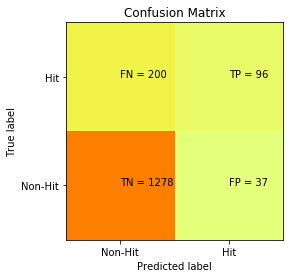



Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92      1315
         1.0       0.72      0.32      0.45       296

    accuracy                           0.85      1611
   macro avg       0.79      0.65      0.68      1611
weighted avg       0.84      0.85      0.83      1611



In [50]:
# First look at gradient boost. Using this as an example model because it was the best performing.
results_summary(binary_gradient, X_train, y_train, X_test, y_test)

## Further Preprocessing to Improve Accuracy

<font color='red'> Add in explanation of maximizing recall and balance recall/precision for HITS. More explanation here.

Looking at the first results, the model seems to be doing a great job predicting non-hits, but struggles predicting hits. Here are a few changed I'll make to hopefully improve the vanilla models. 
- In order to hopefully improve some of the recall for actual hits, I will attempt SMOTE class rebalancing. 
- Standard scalar applied to all features to improve performance
- Kfold cross validation used to validate each model. K is 10 in this case

In [51]:
#Scaling all X data here
scale = StandardScaler()


In [190]:
# Getting cat variables
categorical = model_data.loc[:, model_data.dtypes == np.object]

#converting data types to "category", helpful for Keras
for col in categorical.columns: 
    categorical[col] = categorical[col].astype('category')

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [210]:
categorical.head()
# Getting dummies
cat_dummies = pd.get_dummies(categorical)

In [192]:
# Pulling numerical data
numerical = model_data.loc[:, model_data.dtypes == np.float64]

In [194]:
# Scaling numerical columns
numerical['Year_of_Release'] = scale.fit_transform(numerical.Year_of_Release.values.reshape(-1,1))
numerical['Critic_Score'] = scale.fit_transform(numerical.Critic_Score.values.reshape(-1,1))
numerical['Critic_Count'] = scale.fit_transform(numerical.Critic_Count.values.reshape(-1,1))
numerical['User_Score'] = scale.fit_transform(numerical.User_Score.values.reshape(-1,1))
numerical['User_Count'] = scale.fit_transform(numerical.User_Count.values.reshape(-1,1))

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [195]:
numerical.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits
0,-0.342001,0.414052,1.147720,0.565776,0.250650,1.0
2,0.132985,0.846763,2.292146,0.774012,0.909375,1.0
3,0.370478,0.702526,2.292146,0.565776,0.029373,1.0
6,-0.342001,1.351592,1.875991,0.912836,0.436182,1.0
7,-0.342001,-0.884080,0.627527,-0.405992,-0.077862,1.0


In [211]:
# Final features- combining numerical and categorical
final_features_scaled = pd.concat([numerical, cat_dummies], axis=1, join_axes=[numerical.index])

In [214]:
# Features
scaled_X = final_features_scaled.drop('BINARY_Hits', axis=1)

In [215]:
# Target
target = final_features_scaled['BINARY_Hits']

**Quick Look at Correlation Map**

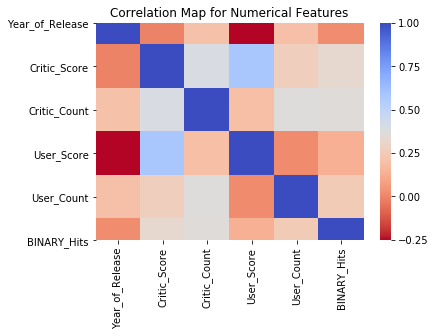

In [232]:
scaled_corr = numerical.corr()
sns.heatmap(scaled_corr, cmap='coolwarm_r' , annot_kws={'size':20})
plt.title("Correlation Map for Numerical Features")
plt.show()

It looks like hits is most highly correlated with **critic score and critic count** among numerical variables.

In [216]:
#Resetting train ant test variables with scaled_X
X_train, X_test, y_train, y_test = train_test_split(scaled_X, target, test_size=0.20, random_state= 10)  

In [217]:
#Applying Kfold cross validation to validate each model. Note I use 10 fold cross validation 
kfold = KFold(n_splits=10, shuffle=True, random_state=11)



       Model Name  Mean 10-Fold CV Accuracy
3  Gradient Boost                  0.877603
7             XGB                  0.876431
5         Bagging                  0.871593
1   Random Forest                  0.871446
4       ADA Boost                  0.870127
0             SVM                  0.855030
2             KNN                  0.850045
6   Decision Tree                  0.829081



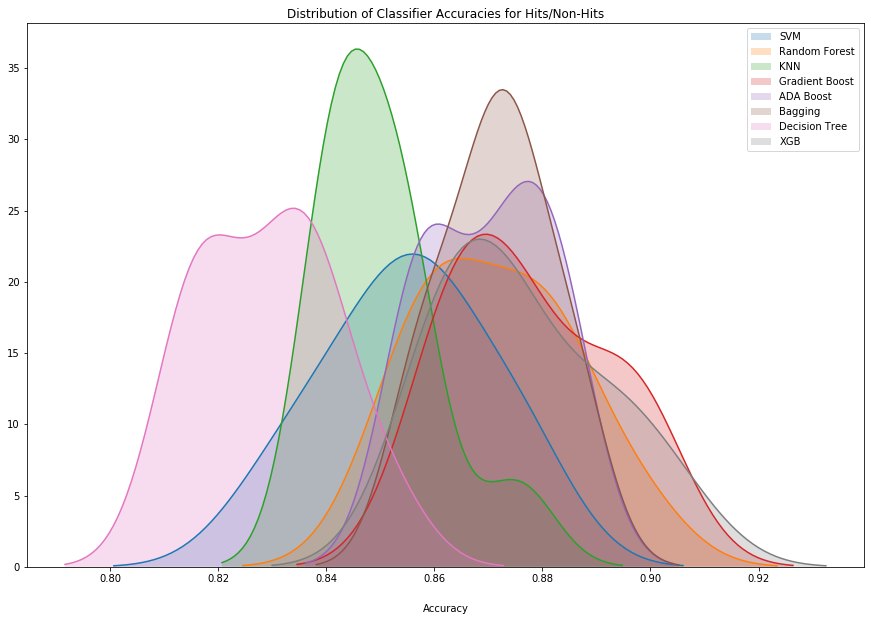

In [218]:
#Updating list of model names and model list to exclude Naive Bayes (an outlier in the worst way)
# Putting them into a list of models that I can than iterate over using my helper functions
list_of_models = [binary_svm, binary_forest, binary_knn, binary_gradient, binary_adaboost, binary_bag, binary_tree, binary_XGB]
list_of_model_names = ['SVM', 'Random Forest', 'KNN', 'Gradient Boost', 'ADA Boost', 'Bagging', 'Decision Tree', 'XGB']

# Renaming the target to y
y = target
means = []

mean_accuracies = []
model_names_list = []

#Calculating cross validation scores for each model in a loop
for j, model in enumerate(list_of_models):
    accuracy = cross_val_score(model, scaled_X, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    means.append(accuracy)

    mean_accuracies.append(np.mean(accuracy))
    model_names_list.append(list_of_model_names[j])


    #print(list_of_model_names[j], np.mean(accuracy))


fig, ax = plt.subplots(1, 1, figsize=[15,10])

#Putting those scores into a visualization
for i in range(len(means)):
    sns.distplot(means[i], hist=False, kde_kws={'shade': True})

ax.set_title(f'Distribution of Classifier Accuracies for Hits/Non-Hits')
ax.legend(list_of_model_names)
ax.set_xlabel('Accuracy', labelpad=20)


d = {'Model Name': model_names_list, 'Mean 10-Fold CV Accuracy': mean_accuracies}
mean_cv_accuracy_df = pd.DataFrame(data=d)



#print(str(target))
print("")
print(mean_cv_accuracy_df.sort_values(by=['Mean 10-Fold CV Accuracy'], ascending=False))
print("")

plt.show()

This visualization confirms that the following are going to be the best models to use going forward...
- SVM
- Gradient Boost
- XGB
- ADA Boost

# <font color='red'> Attempt model stacking for logisitic regression (instead of SMOTE)

In [219]:
# Rebalancing classes using SMOTE
print(y_train.value_counts()) #Previous original class distribution
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

0.0    4387
1.0    1070
Name: BINARY_Hits, dtype: int64
0.0    4387
1.0    4387
dtype: int64


In [220]:
model_results = model_results_dataframe(list_of_models, list_of_model_names, X_train_resampled, y_train_resampled, X_test.values, y_test.values)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [221]:
model_results

,Model Name,Training Accuracy,Testing Accuracy
1,Random Forest,0.996695,0.871062
5,Bagging,0.995897,0.861538
3,Gradient Boost,0.906086,0.849084
7,XGB,0.898678,0.846886
4,ADA Boost,0.874744,0.825641
6,Decision Tree,1.000000,0.808059
0,SVM,0.840894,0.787546
2,KNN,0.910189,0.719414


Using SMOTE appears to have exaggerated overfitting slightly for some models, as evidenced in the Random Forest, Bagging, and Decision tree training accuracies of over 99%. 



Accuracy Score: 0.8490842490842491


Confusion Matrix:


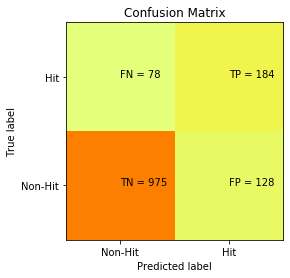



Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      1103
         1.0       0.59      0.70      0.64       262

    accuracy                           0.85      1365
   macro avg       0.76      0.79      0.77      1365
weighted avg       0.86      0.85      0.85      1365



In [222]:
# new results summary using SMOTE, scaled data, and cross validation
results_summary(binary_gradient, X_train_resampled, y_train_resampled, X_test, y_test)

# Hyperparameter Tuning

In [58]:
# Establishing hyperparameter grids for tuning

#SVM Tuning
svm_param_grid ={
    'C': [0.5, 1, 2, 5],
    'gamma': [0.01, 0.1, 0.4, 0.8],
    'kernel': ['rbf', 'linear']
}


gb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [20, 30, 40],
    'max_depth': [2, 4, 6]
    
}

ada_param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [20, 30, 40]
}

xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.3, 0.9],
    'gamma': [0.1, 1, 5, 10],
    'max_depth': [2, 3, 6]
    
}

In [90]:
#Grid search to find best parameters for SVM
svm_grid_search = GridSearchCV(binary_svm, svm_param_grid, cv=kfold)
svm_grid_search.fit(scaled_X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=11, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=11, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.5, 1, 2, 5], 'gamma': [0.01, 0.1, 0.4, 0.8],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
#Gridsearch to find best parameters for gradient boost
gb_grid_search = GridSearchCV(binary_gradient, gb_param_grid, cv=kfold)
gb_grid_search.fit(scaled_X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=11, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weigh...af=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [93]:
# #Grid search to find best parameters for SVM
# svm_grid_search = GridSearchCV(binary_svm, svm_param_grid, cv=kfold)
# svm_grid_search.fit(scaled_X, y)

# #Gridsearch to find best parameters for gradient boost
# gb_grid_search = GridSearchCV(binary_gradient, gb_param_grid, cv=kfold)
# gb_grid_search.fit(scaled_X, y)

#Gridsearch to find best parameters for gradient boost
ada_grid_search = GridSearchCV(binary_adaboost, ada_param_grid, cv=kfold)
ada_grid_search.fit(scaled_X, y)

xgb_grid_search = GridSearchCV(binary_XGB, xgb_param_grid, cv=kfold)
xgb_grid_search.fit(scaled_X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=11, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=11, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0.1, 1, 5, 10],
                         'learning_rate': [0.05, 0.1, 0.3, 0.9],
                         

In [94]:
#Putting all of the grid searched models into a list so I can iterate through them and put the results into a dataframe
list_of_fitted_grid_searches = [svm_grid_search, gb_grid_search, ada_grid_search, xgb_grid_search]

In [95]:
# Compiling a list of all the new model accuracies and their optimal parameters into a dataframe
selected_model_names = ['SVC', 'Gradient Boosting', 'ADA Boost', 'XGB']

grid_search_results_list = []

for i, gs in enumerate(list_of_fitted_grid_searches):
    
    testing_accuracy = str("{:.4}%".format(gs.best_score_ * 100))
    optimal_parameters = gs.best_params_

    grid_search_results_list.append([selected_model_names[i], testing_accuracy, optimal_parameters])

In [96]:
grid_search_results_df = pd.DataFrame(data=grid_search_results_list, columns=['Model', 'Testing Accuracy', 'Optimal Parameters'])
grid_search_results_df

,Model,Testing Accuracy,Optimal Parameters
0,SVC,86.99%,"{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Gradient Boosting,86.81%,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti..."
2,ADA Boost,85.82%,"{'learning_rate': 1.0, 'n_estimators': 40}"
3,XGB,87.4%,"{'gamma': 0.1, 'learning_rate': 0.3, 'max_dept..."


In [97]:
#Printing out optimal parameters for each model
for i in range(0, len(grid_search_results_df['Model'])):
    print("Optimal Parameters for {}: ".format(grid_search_results_df['Model'][i]))
    print(grid_search_results_df['Optimal Parameters'][i])

Optimal Parameters for SVC: 
{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Optimal Parameters for Gradient Boosting: 
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 40}
Optimal Parameters for ADA Boost: 
{'learning_rate': 1.0, 'n_estimators': 40}
Optimal Parameters for XGB: 
{'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 6}


It appears that XGB and SVC are the highest performing models. I'll do further analysis of these two with their tuned hyperparameters.

In [98]:
# Final models with optimal hyperparameters
svc_final = SVC(random_state = 11, C=2, gamma=0.01, kernel='rbf')
xgb_final = xgb.XGBClassifier(seed=11, gamma=1, learning_rate=0.3, max_depth=6)

# Final SVC Results



Accuracy Score: 0.8292985723153321


Confusion Matrix:


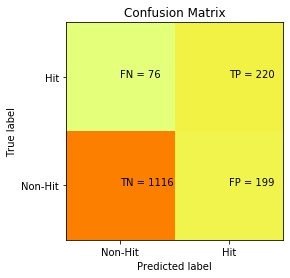



Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      1315
         1.0       0.53      0.74      0.62       296

    accuracy                           0.83      1611
   macro avg       0.73      0.80      0.75      1611
weighted avg       0.86      0.83      0.84      1611



In [131]:
results_summary(svc_final, X_train_resampled, y_train_resampled, X_test, y_test)

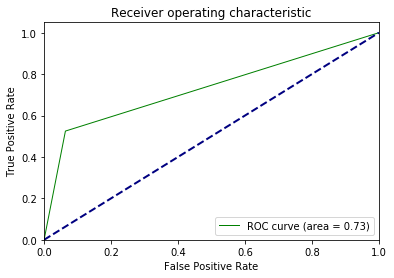

In [100]:
roc_curves(svc_final, X_train_resampled, y_train_resampled, X_test, y_test)

# Final XGB Results



Accuracy Score: 0.8628181253879578


Confusion Matrix:


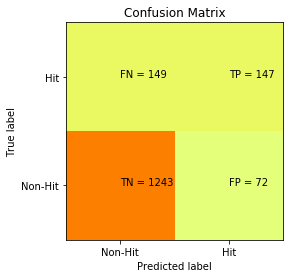



Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1315
         1.0       0.67      0.50      0.57       296

    accuracy                           0.86      1611
   macro avg       0.78      0.72      0.74      1611
weighted avg       0.85      0.86      0.85      1611



In [101]:
results_summary(xgb_final, X_train_resampled, y_train_resampled, X_test.values, y_test.values)

**Feature Importances**

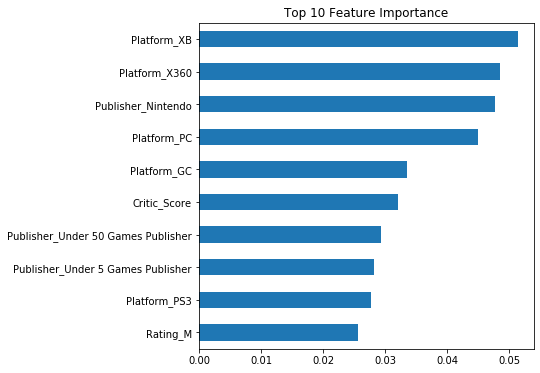

In [102]:
feature_importance_visualization(xgb_final, X_train, y_train, 'Top 10 Feature Importance')

In [103]:
feature_importances = pd.Series(xgb_final.feature_importances_, X_train.columns).sort_values(ascending=False)

In [104]:
feature_importances[:10]

Platform_XB                           0.051425
Platform_X360                         0.048508
Publisher_Nintendo                    0.047759
Platform_PC                           0.045015
Platform_GC                           0.033506
Critic_Score                          0.032171
Publisher_Under 50 Games Publisher    0.029424
Publisher_Under 5 Games Publisher     0.028232
Platform_PS3                          0.027823
Rating_M                              0.025585
dtype: float32

## Further reducing dimensionality using PCA

In order to reduce dimensionality, I will put my models through a pipeline in which features are first downscaled using PCA. I use PCA to select the number of features that allows me to keep 99% of my explained variance.

In [105]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=10)
pca_2 = PCA(n_components=5)
pca_3 = PCA(n_components=15)

principalComponents = pca_1.fit_transform(features)
principalComponents = pca_2.fit_transform(features)
principalComponents = pca_3.fit_transform(features)


pca = PCA(n_components=12)
principalComponents = pca.fit_transform(features)
print(np.sum(pca.explained_variance_ratio_))

0.9928616728703596


In [106]:
# Creating pipelines with PCA
pipe_svm = Pipeline([('pca', PCA(n_components=27)),
                    ('clf', SVC(random_state = 11, C=2, gamma=0.01, kernel='rbf'))])

pipe_XGB = Pipeline([('pca', PCA(n_components=27)),
                    ('clf', xgb.XGBClassifier(seed=11, gamma=1, learning_rate=0.3, max_depth=6))])



In [107]:
pipelines = [pipe_svm, pipe_XGB]
pipeline_names = ['Support Vector Machine', 'XGB']

In [108]:
# Loop to fit the pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=27,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.01,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=11, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=27,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=1, gamma=1,
                   

In [109]:
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Support Vector Machine pipeline test accuracy: 0.785
XGB pipeline test accuracy: 0.836




Accuracy Score: 0.8007448789571695


Confusion Matrix:


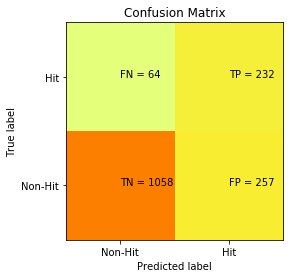



Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87      1315
         1.0       0.47      0.78      0.59       296

    accuracy                           0.80      1611
   macro avg       0.71      0.79      0.73      1611
weighted avg       0.86      0.80      0.82      1611



In [110]:
# SVM Results
results_summary(pipe_svm, X_train_resampled, y_train_resampled, X_test, y_test)

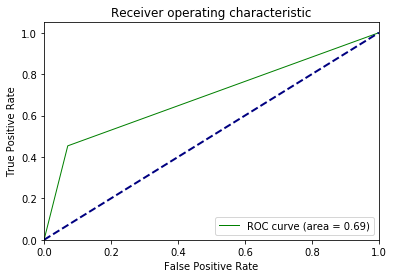

In [420]:
roc_curves(pipe_svm, X_train_resampled, y_train_resampled, X_test, y_test)



Accuracy Score: 0.824332712600869


Confusion Matrix:


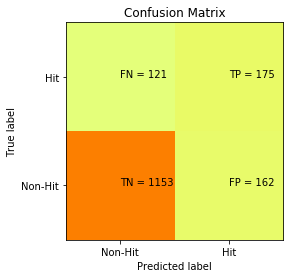



Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      1315
         1.0       0.52      0.59      0.55       296

    accuracy                           0.82      1611
   macro avg       0.71      0.73      0.72      1611
weighted avg       0.83      0.82      0.83      1611



In [111]:
# XGB Results
results_summary(pipe_XGB, X_train_resampled, y_train_resampled, X_test, y_test)

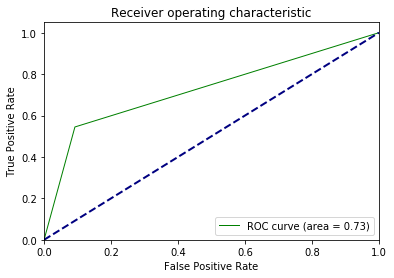

In [419]:
roc_curves(pipe_XGB, X_train_resampled, y_train_resampled, X_test, y_test)

Overall, it seems that adding PCA slightly improved performance. 

# Deep Learning Classification Model

In [338]:
final_features.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft,Publisher_Under 5 Games Publisher,Publisher_Under 50 Games Publisher,Rating_E,Rating_E10+,Rating_M,Rating_T
0,-0.342001,0.414052,1.147720,0.565776,0.250650,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.132985,0.846763,2.292146,0.774012,0.909375,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.370478,0.702526,2.292146,0.565776,0.029373,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,-0.342001,1.351592,1.875991,0.912836,0.436182,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,-0.342001,-0.884080,0.627527,-0.405992,-0.077862,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [281]:
n_inputs = X_train.shape[1]

deep_learning_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [282]:
deep_learning_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [286]:
model1_hist = deep_learning_model.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=20, shuffle=True, verbose=2)

Train on 4365 samples, validate on 1092 samples
Epoch 1/20
 - 0s - loss: 0.1564 - acc: 0.9395 - val_loss: 0.3532 - val_acc: 0.8745
Epoch 2/20
 - 0s - loss: 0.1493 - acc: 0.9409 - val_loss: 0.3499 - val_acc: 0.8700
Epoch 3/20
 - 0s - loss: 0.1423 - acc: 0.9457 - val_loss: 0.3843 - val_acc: 0.8636
Epoch 4/20
 - 0s - loss: 0.1370 - acc: 0.9475 - val_loss: 0.3820 - val_acc: 0.8709
Epoch 5/20
 - 0s - loss: 0.1308 - acc: 0.9501 - val_loss: 0.3768 - val_acc: 0.8672
Epoch 6/20
 - 0s - loss: 0.1274 - acc: 0.9519 - val_loss: 0.3946 - val_acc: 0.8672
Epoch 7/20
 - 0s - loss: 0.1258 - acc: 0.9528 - val_loss: 0.4275 - val_acc: 0.8581
Epoch 8/20
 - 0s - loss: 0.1137 - acc: 0.9574 - val_loss: 0.4332 - val_acc: 0.8681
Epoch 9/20
 - 0s - loss: 0.1124 - acc: 0.9560 - val_loss: 0.4372 - val_acc: 0.8690
Epoch 10/20
 - 0s - loss: 0.1030 - acc: 0.9615 - val_loss: 0.4287 - val_acc: 0.8690
Epoch 11/20
 - 0s - loss: 0.1007 - acc: 0.9597 - val_loss: 0.4333 - val_acc: 0.8782
Epoch 12/20
 - 0s - loss: 0.0934 - ac

1365/1365 [==============================] - ETA:  - 0s 10us/step
Confusion matrix, without normalization


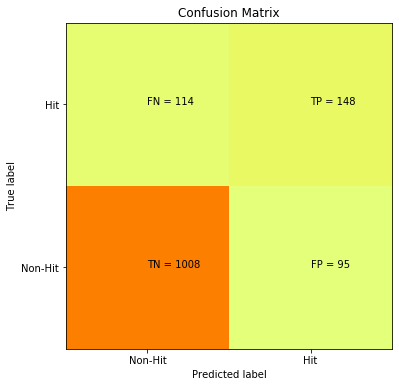

Normalized confusion matrix


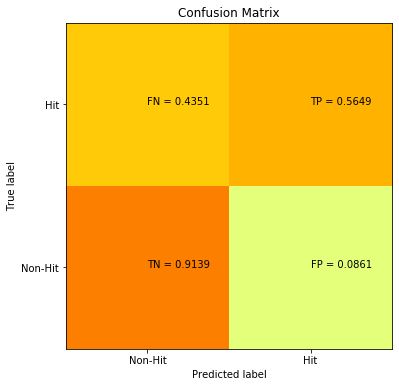

MODEL Deep Learning Basic 
Accuracy Score: 0.8469 
Loss: 0.6025

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

     Non-Hit       0.90      0.91      0.91      1103
         Hit       0.61      0.56      0.59       262

    accuracy                           0.85      1365
   macro avg       0.75      0.74      0.75      1365
weighted avg       0.84      0.85      0.84      1365



In [287]:
results_summary_binary(deep_learning_model, 'Deep Learning Basic', X_test, y_test)

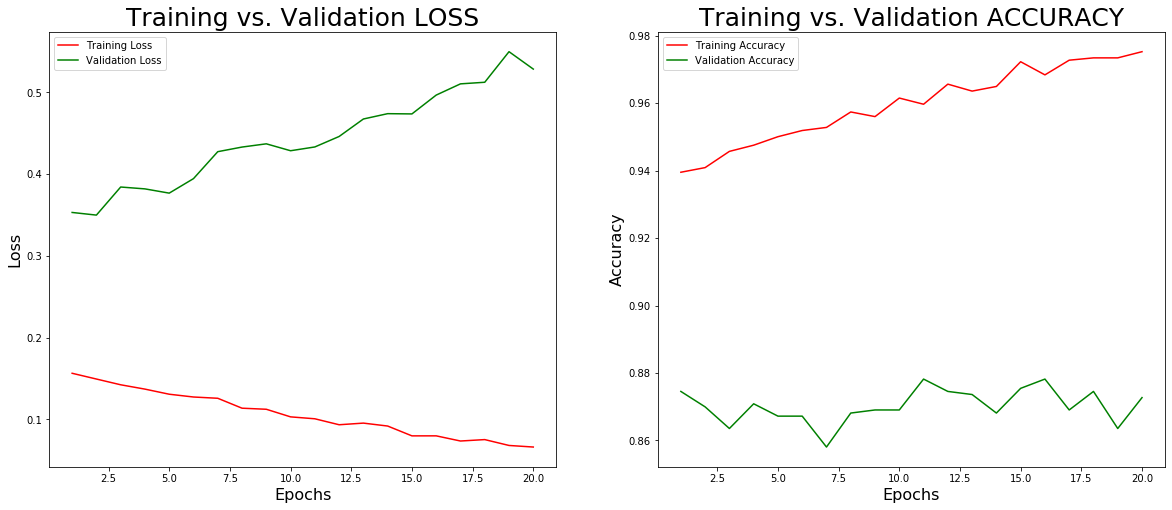

In [288]:
deep_learning_visuals(model1_hist)

Not terrible for a first attempt! Better than pretty much all of the machine learning algorithms.

## Refining Deep Learning Models

In [298]:
# Adding two dropout layers and trying softmax activation
deep_learning_2 = Sequential()
deep_learning_2.add(Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'))
deep_learning_2.add(Dropout(0.5))
deep_learning_2.add(Dense(50, activation='relu'))
deep_learning_2.add(Dropout(0.5))
deep_learning_2.add(Dense(2, activation='softmax'))

In [300]:
deep_learning_2.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [302]:
model2_hist = deep_learning_2.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=20, shuffle=True, verbose=2)

Train on 4365 samples, validate on 1092 samples
Epoch 1/20
 - 0s - loss: 0.5562 - acc: 0.7230 - val_loss: 0.4123 - val_acc: 0.8370
Epoch 2/20
 - 0s - loss: 0.4396 - acc: 0.8144 - val_loss: 0.3899 - val_acc: 0.8416
Epoch 3/20
 - 0s - loss: 0.4105 - acc: 0.8254 - val_loss: 0.3779 - val_acc: 0.8434
Epoch 4/20
 - 0s - loss: 0.3990 - acc: 0.8376 - val_loss: 0.3660 - val_acc: 0.8489
Epoch 5/20
 - 0s - loss: 0.3793 - acc: 0.8389 - val_loss: 0.3588 - val_acc: 0.8581
Epoch 6/20
 - 0s - loss: 0.3721 - acc: 0.8454 - val_loss: 0.3550 - val_acc: 0.8581
Epoch 7/20
 - 0s - loss: 0.3586 - acc: 0.8497 - val_loss: 0.3456 - val_acc: 0.8672
Epoch 8/20
 - 0s - loss: 0.3532 - acc: 0.8527 - val_loss: 0.3427 - val_acc: 0.8672
Epoch 9/20
 - 0s - loss: 0.3467 - acc: 0.8573 - val_loss: 0.3403 - val_acc: 0.8690
Epoch 10/20
 - 0s - loss: 0.3357 - acc: 0.8598 - val_loss: 0.3387 - val_acc: 0.8645
Epoch 11/20
 - 0s - loss: 0.3409 - acc: 0.8580 - val_loss: 0.3350 - val_acc: 0.8745
Epoch 12/20
 - 0s - loss: 0.3358 - ac

1365/1365 [==============================] - ETA:  - 0s 10us/step
Confusion matrix, without normalization


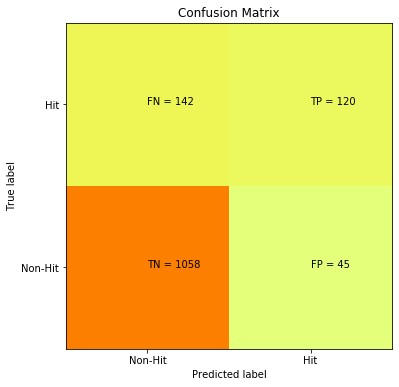

Normalized confusion matrix


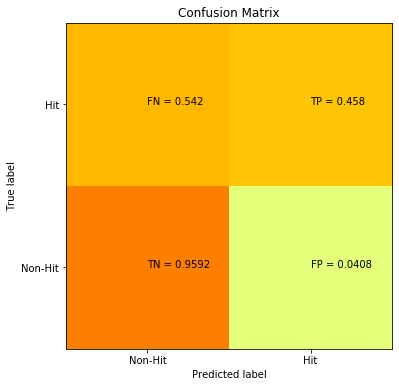

MODEL Deep Learning Second Try 
Accuracy Score: 0.863 
Loss: 0.3321

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

     Non-Hit       0.88      0.96      0.92      1103
         Hit       0.73      0.46      0.56       262

    accuracy                           0.86      1365
   macro avg       0.80      0.71      0.74      1365
weighted avg       0.85      0.86      0.85      1365



In [304]:
results_summary_binary(deep_learning_2, 'Deep Learning Second Try', X_test, y_test)

In [321]:
# Added in kernel regularizers, stuck with softmax
deep_learning_3 = Sequential()
deep_learning_3.add(Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'))
deep_learning_3.add(Dropout(0.5))
deep_learning_3.add(Dense(50, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
deep_learning_3.add(Dropout(0.5))
deep_learning_3.add(Dense(2, activation='softmax'))

In [322]:
deep_learning_3.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [323]:
deep_learning_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 53)                2862      
_________________________________________________________________
dropout_15 (Dropout)         (None, 53)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 50)                2700      
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 102       
Total params: 5,664
Trainable params: 5,664
Non-trainable params: 0
_________________________________________________________________


In [324]:
model3_hist = deep_learning_3.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=20, shuffle=True, verbose=2)

Train on 4365 samples, validate on 1092 samples
Epoch 1/20
 - 0s - loss: 0.9312 - acc: 0.7468 - val_loss: 0.6968 - val_acc: 0.8342
Epoch 2/20
 - 0s - loss: 0.6464 - acc: 0.8247 - val_loss: 0.5464 - val_acc: 0.8352
Epoch 3/20
 - 0s - loss: 0.5272 - acc: 0.8312 - val_loss: 0.4709 - val_acc: 0.8452
Epoch 4/20
 - 0s - loss: 0.4637 - acc: 0.8387 - val_loss: 0.4236 - val_acc: 0.8462
Epoch 5/20
 - 0s - loss: 0.4247 - acc: 0.8405 - val_loss: 0.3983 - val_acc: 0.8562
Epoch 6/20
 - 0s - loss: 0.3974 - acc: 0.8481 - val_loss: 0.3804 - val_acc: 0.8672
Epoch 7/20
 - 0s - loss: 0.3914 - acc: 0.8520 - val_loss: 0.3685 - val_acc: 0.8681
Epoch 8/20
 - 0s - loss: 0.3668 - acc: 0.8621 - val_loss: 0.3586 - val_acc: 0.8690
Epoch 9/20
 - 0s - loss: 0.3616 - acc: 0.8591 - val_loss: 0.3547 - val_acc: 0.8645
Epoch 10/20
 - 0s - loss: 0.3582 - acc: 0.8566 - val_loss: 0.3537 - val_acc: 0.8636
Epoch 11/20
 - 0s - loss: 0.3546 - acc: 0.8580 - val_loss: 0.3506 - val_acc: 0.8617
Epoch 12/20
 - 0s - loss: 0.3432 - ac

1365/1365 [==============================] - ETA:  - 0s 11us/step
Confusion matrix, without normalization


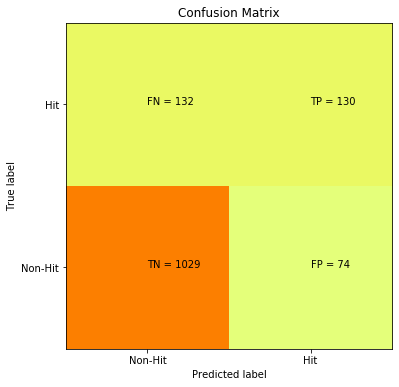

Normalized confusion matrix


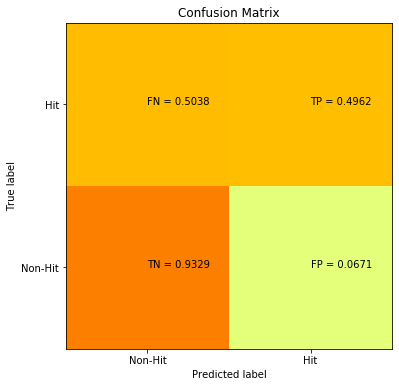

MODEL Deep Learning Third Try 
Accuracy Score: 0.8491 
Loss: 0.3539

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

     Non-Hit       0.89      0.93      0.91      1103
         Hit       0.64      0.50      0.56       262

    accuracy                           0.85      1365
   macro avg       0.76      0.71      0.73      1365
weighted avg       0.84      0.85      0.84      1365



In [325]:
results_summary_binary(deep_learning_3, 'Deep Learning Third Try', X_test, y_test)

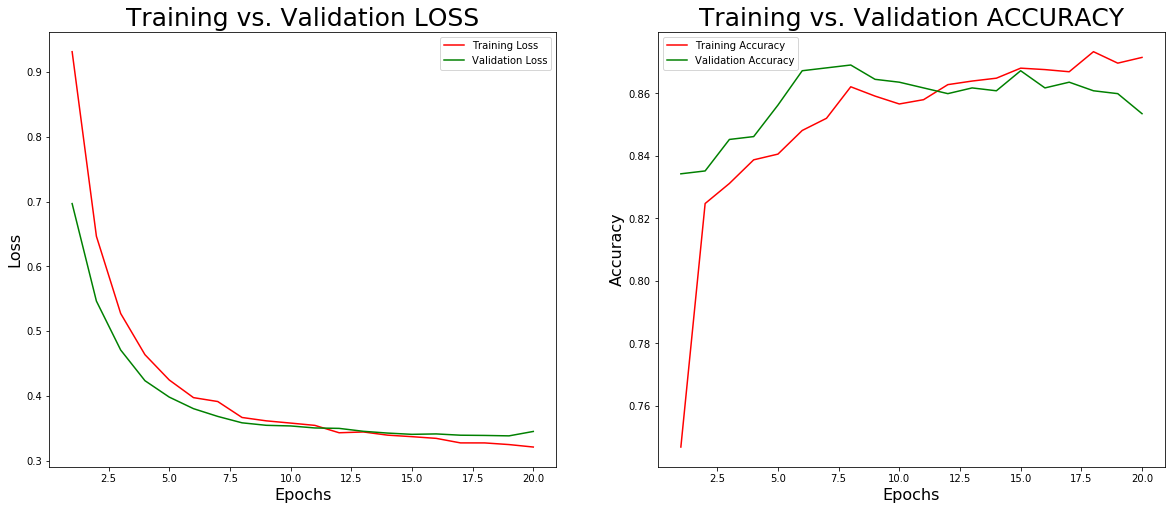

In [326]:
deep_learning_visuals(model3_hist)

In [337]:
len(deep_learning_3.predict(scaled_X)[:,1])

6822

## ^^ BEST MODEL YET ACCORDING TO VISUALS

## Predicting 2016 Hits

Since this data was scraped at the beginning of 2017, there's a good chance that the 2016 games that might become hits have not yet reached the 1,000,000 unit sales threshold. Below, I use my model to predict which 2016 games have the highest chance of becoming hits.

In [340]:
final_features

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft,Publisher_Under 5 Games Publisher,Publisher_Under 50 Games Publisher,Rating_E,Rating_E10+,Rating_M,Rating_T
0,-0.342001,0.414052,1.147720,0.565776,0.250650,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.132985,0.846763,2.292146,0.774012,0.909375,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.370478,0.702526,2.292146,0.565776,0.029373,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,-0.342001,1.351592,1.875991,0.912836,0.436182,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,-0.342001,-0.884080,0.627527,-0.405992,-0.077862,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0.370478,1.207355,2.656282,0.843424,0.713630,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,-0.579495,1.495829,1.823972,0.982248,0.492352,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
13,-0.104508,0.702526,1.771953,0.357540,-0.048925,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14,0.607971,-0.667725,0.835604,-0.614228,-0.117011,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15,0.370478,0.702526,0.211372,0.149304,-0.208926,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [362]:
names_and_index = pd.DataFrame(preprocessed_data[['Name', 'Year_of_Release']])

In [363]:
names_and_index.head()

,Name,Year_of_Release
0,Wii Sports,2006.0
1,Super Mario Bros.,1985.0
2,Mario Kart Wii,2008.0
3,Wii Sports Resort,2009.0
4,Pokemon Red/Pokemon Blue,1996.0


In [368]:
names_and_index.rename(columns={'Year_of_Release': 'Release_Year'}, inplace=True)

In [370]:
features_with_names = final_features.merge(names_and_index, how='left', left_index=True, right_index=True)

In [371]:
features_with_names.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Publisher_Take-Two Interactive,Publisher_Ubisoft,Publisher_Under 5 Games Publisher,Publisher_Under 50 Games Publisher,Rating_E,Rating_E10+,Rating_M,Rating_T,Name,Release_Year
0,-0.342001,0.414052,1.147720,0.565776,0.250650,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,Wii Sports,2006.0
2,0.132985,0.846763,2.292146,0.774012,0.909375,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,Mario Kart Wii,2008.0
3,0.370478,0.702526,2.292146,0.565776,0.029373,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,Wii Sports Resort,2009.0
6,-0.342001,1.351592,1.875991,0.912836,0.436182,1.0,0,0,1,0,...,0,0,0,0,1,0,0,0,New Super Mario Bros.,2006.0
7,-0.342001,-0.884080,0.627527,-0.405992,-0.077862,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,Wii Play,2006.0


In [383]:
X = features_with_names.drop(['Name', 'Release_Year', 'BINARY_Hits'], axis=1)

In [384]:
predictions = deep_learning_3.predict(X)

In [385]:
predictions

array([[2.7644053e-01, 7.2355950e-01],
       [1.3102031e-01, 8.6897963e-01],
       [1.8050845e-01, 8.1949157e-01],
       ...,
       [9.8912162e-01, 1.0878377e-02],
       [9.9849010e-01, 1.5099081e-03],
       [9.9935836e-01, 6.4162153e-04]], dtype=float32)

In [386]:
features_with_names['Hit_Probability'] = predictions[:,1]

In [387]:
features_with_names.sort_values(by='Hit_Probability', ascending=False)

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,BINARY_Hits,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Publisher_Ubisoft,Publisher_Under 5 Games Publisher,Publisher_Under 50 Games Publisher,Rating_E,Rating_E10+,Rating_M,Rating_T,Name,Release_Year,Hit_Probability
29,0.845465,1.279474,2.708301,-2.627176,14.533238,1.0,0,0,0,0,...,0,0,0,0,0,1,0,Call of Duty: Modern Warfare 3,2011.0,0.996492
149,1.320451,1.784303,3.592631,1.329308,13.324724,1.0,0,0,0,0,...,0,0,1,0,0,1,0,The Last of Us,2013.0,0.996207
171,2.032931,1.640066,4.372921,0.496364,11.726423,1.0,0,0,0,0,...,0,0,0,0,0,0,1,Uncharted 4: A Thief's End,2016.0,0.995032
150,0.132985,1.784303,2.916379,-0.267168,8.742586,1.0,0,0,0,0,...,0,0,0,1,0,0,0,LittleBigPlanet,2008.0,0.994059
302,1.795437,1.567948,2.604263,1.398720,17.028563,1.0,0,0,0,0,...,0,0,0,0,0,1,0,The Witcher 3: Wild Hunt,2015.0,0.993874
618,1.795437,1.567948,3.696669,0.982248,10.567271,1.0,0,0,0,0,...,0,0,0,0,0,1,0,Bloodborne,2015.0,0.992710
121,0.370478,1.856422,3.956766,1.121072,8.531521,1.0,0,0,0,0,...,0,0,0,0,0,0,1,Uncharted 2: Among Thieves,2009.0,0.990915
191,1.082958,1.279474,2.968398,-2.210704,16.092391,1.0,0,0,0,0,...,0,0,0,0,0,1,0,Diablo III,2012.0,0.988819
154,1.557944,0.414052,3.436572,-0.753052,8.860033,1.0,0,0,0,0,...,0,0,0,0,0,0,1,Destiny,2014.0,0.984238
36,0.370478,1.712185,3.696669,-0.614228,4.294915,1.0,0,0,0,0,...,0,0,0,0,0,1,0,Call of Duty: Modern Warfare 2,2009.0,0.983128


In [398]:
hit_prob_df = features_with_names[['Name', 'Release_Year', 'Hit_Probability', 'BINARY_Hits']]

In [406]:
hit_prob_df_2016 = hit_prob_df.loc[hit_prob_df['Release_Year'] == 2016]

In [408]:
hit_prob_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 94 to 16383
Data columns (total 4 columns):
Name               212 non-null object
Release_Year       212 non-null float64
Hit_Probability    212 non-null float32
BINARY_Hits        212 non-null float64
dtypes: float32(1), float64(2), object(1)
memory usage: 7.5+ KB


In [414]:
sorted_hit_df = hit_prob_df_2016.sort_values(by='Hit_Probability', ascending=False)

## The dataframe below shows which games released in 2016 (that were not hits at the time this data was pulled) are most likely to become hits.

In [416]:
sorted_hit_df.loc[sorted_hit_df['BINARY_Hits'] == 0].head(20)

,Name,Release_Year,Hit_Probability,BINARY_Hits
3555,Quantum Break,2016.0,0.957028,0.0
4937,Deus Ex: Mankind Divided,2016.0,0.804837,0.0
4297,Pro Evolution Soccer 2017,2016.0,0.787236,0.0
3718,Overwatch,2016.0,0.786418,0.0
5244,Mirror's Edge Catalyst,2016.0,0.700738,0.0
6886,XCOM 2,2016.0,0.694644,0.0
8356,Mirror's Edge Catalyst,2016.0,0.661516,0.0
5100,Star Fox: Zero,2016.0,0.630803,0.0
4571,Paper Mario: Color Splash,2016.0,0.621481,0.0
5058,DiRT Rally,2016.0,0.615051,0.0


# <font color='red'> What is the lagtime to become a hit??? 

# Modeling: VGChartz Conclusions

- Overall, the last deep learning model with regularization and softmax activation proved the most effective.
    - While this model didn't have the highest combined accuracy, it had the best mix of recall and precision and the highest accuracy. 
- Putting models into pipelines with PCA was effective in increasing accuracy, and most important improving precision and recall scores for "hit" labels. 
- Predicting hits was much more difficult for the models than predicting non-hits. Even with SMOTE (minority oversampling), the accuracy, recall, and precision scores were much lower for hits than non-hits. 
    - This is reflected in the normalized confusion matrices as well. 

# Future Model Improvements

**Lack of Data**

One of the things this model suffered from the most was lack of data. For deep learning algorithms and even machine learning algorithms like the ones implemented in this notebook, more data is always better. After eliminating null values so all numerical columns could be used for modeling, there were only around 7,000 games left. This is enough to get results, but when iterating through 40 epochs like some of the deep learning models do, a small sample of training data is going to lead to model over-fitting and poorer test results. 

Furthermore, for the most recent scrape of VGChartz data in 2019, the data was highly incomplete. The 2016 data had very few null values, especailly in crucial numeric modeling columns (User_Score, User_Count, Critic_Score, Critic_Count). As such, for the purposes of a functional model, most of the 2017 and 2018 data had to be scrubbed. 

**Complimentary Support Data**

As mentioned in the readme, vgchartz is vague about the source of it's data. They explain that they collect their data from "sources within the industry" and "retail partners." VGChartz also uses statistical sampling methodology to estimate their sales numbers, so even these numbers are estimates without any sort of variance information provided.

Ideally, there would be another third party website that collects video-game data, or individual game data would be released in company financial statements. However, no such granularity exists in quarterly or annual SEC filings from any of the three major console competitors: Microsoft, Sony, and Nintendo. 

**Improved Handling of Categorical Variables**

Given the lack of extensive numerical information, the models in this notebook depended heavily on categorical variables. Several of these categorical variables had a lot of different dimensions: particularly publishers. Before any trimming, there were over 500 publishers, which I ended up condensing down into about 20 by grouping them by size. While this was an acceptable fix for the purposes of modeling, I would like to find better ways to manipulate categorical data to include it in modeling. Simple one-hot encoding sparse vectors seems like a clunky and out-dated solution. 

**Cost and Revenue Information**

The scrape of the data only had information on how many copies of each game had been sold, not at what price or at what cost. To do a more thorough business anlysis of the console war, cost and profit data could be incorporated into the model to define success. In general, finding a different metric besides copies shipped for a measurement of "hit" would allow more numeric columns to be processed for machine learning. 


# <font color='red'> Change color scheme of confusion matrices and results summaries (MAKE BEAUTIFUL).